In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('DrDoS_LDAP_new.csv')

In [3]:
label_encoder = preprocessing.LabelEncoder()
df1[' Label']= label_encoder.fit_transform(df1[' Label'])
df1[' Label'].unique()

array([1, 0])

In [4]:
df1.drop('SimillarHTTP', axis=1, inplace=True)
df1.drop(' Fwd Packet Length Max', axis=1, inplace=True)
df1.drop(' Fwd Packet Length Min', axis=1, inplace=True)
df1.drop('Bwd Packet Length Max', axis=1, inplace=True)
df1.drop(' Bwd Packet Length Min', axis=1, inplace=True)
df1.drop(' Flow IAT Max', axis=1, inplace=True)
df1.drop(' Flow IAT Min', axis=1, inplace=True)
df1.drop(' Fwd IAT Max', axis=1, inplace=True)
df1.drop(' Fwd IAT Min', axis=1, inplace=True)
df1.drop(' Bwd IAT Max', axis=1, inplace=True)
df1.drop(' Bwd IAT Min', axis=1, inplace=True)
df1.drop(' Idle Max', axis=1, inplace=True)
df1.drop(' Idle Min', axis=1, inplace=True)
df1.drop(' Active Max', axis=1, inplace=True)
df1.drop(' Active Min', axis=1, inplace=True)

In [5]:
l = []
for col in df1:
    try:
        if sum(df1[col]) == 0:
            l.append(col)
    except:
        print(col)

In [6]:
df1.drop(l, axis=1, inplace=True)

In [7]:
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.dropna(inplace=True)

In [8]:
from sklearn.utils import resample

In [9]:
majority_class = df1[df1[' Label'] == 1]
minority_class = df1[df1[' Label'] == 0]

In [10]:
minority_upsampled = resample(minority_class, replace=True, n_samples=50000, random_state=42)
majority_downsampled = resample(majority_class, replace=False, n_samples=50000, random_state=42)
balanced_df = pd.concat([minority_upsampled, majority_downsampled])
balanced_df = balanced_df.sample(frac=1, random_state=42)

In [11]:
no = balanced_df[balanced_df[' Label'] == 0]
yes = balanced_df[balanced_df[' Label'] == 1]
print(len(no), len(yes))
del no 
del yes

50000 50000


In [12]:
balanced_df.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Fwd Packet Length Std,...,Label,Source IP1,Source IP2,Source IP3,Source IP4,Destination IP1,Destination IP2,Destination IP3,Destination IP4,newtime
1828060,642,11765,17,1,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-119.675929
1440274,691,41507,17,2,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-121.447822
1744063,54607,53,17,54280,2,2,76.0,188.0,38.0,0.0,...,0,192,168,50,7,8,8,8,8,-120.060124
826984,997,49646,17,1,2,0,2928.0,0.0,1464.0,0.0,...,1,172,16,0,5,192,168,50,1,-124.222314
1519380,941,42639,17,2,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-121.070014


In [13]:
X = balanced_df.drop(columns = ' Label', axis=1)
y = balanced_df[' Label']

In [14]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [15]:
top_features = feature_importance_df.head(20)
len(top_features)

20

In [16]:
copy_df = balanced_df.copy()

In [17]:
x = list(top_features['Feature'])
x.append(' Label')
for i in balanced_df.columns:
    if i not in x:
        copy_df.drop(i, axis=1, inplace=True)

In [18]:
balanced_df.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Fwd Packet Length Std,...,Label,Source IP1,Source IP2,Source IP3,Source IP4,Destination IP1,Destination IP2,Destination IP3,Destination IP4,newtime
1828060,642,11765,17,1,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-119.675929
1440274,691,41507,17,2,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-121.447822
1744063,54607,53,17,54280,2,2,76.0,188.0,38.0,0.0,...,0,192,168,50,7,8,8,8,8,-120.060124
826984,997,49646,17,1,2,0,2928.0,0.0,1464.0,0.0,...,1,172,16,0,5,192,168,50,1,-124.222314
1519380,941,42639,17,2,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-121.070014


In [19]:
copy_df.head()

,Destination Port,Flow Duration,Total Length of Fwd Packets,Fwd Packet Length Mean,Flow Bytes/s,Flow IAT Std,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,...,Avg Fwd Segment Size,Subflow Fwd Bytes,Inbound,Label,Source IP1,Source IP2,Source IP3,Source IP4,Destination IP1,Destination IP4
1828060,11765,1,2944.0,1472.0,2.944000e+09,0.000000,2.000000e+06,1472.0,1472.0,1472.0,...,1472.0,2944,1,1,172,16,0,5,192,1
1440274,41507,2,2944.0,1472.0,1.472000e+09,0.000000,1.000000e+06,1472.0,1472.0,1472.0,...,1472.0,2944,1,1,172,16,0,5,192,1
1744063,53,54280,76.0,38.0,4.863670e+03,31334.242489,3.684598e+01,38.0,94.0,60.4,...,38.0,76,0,0,192,168,50,7,8,8
826984,49646,1,2928.0,1464.0,2.928000e+09,0.000000,2.000000e+06,1464.0,1464.0,1464.0,...,1464.0,2928,1,1,172,16,0,5,192,1
1519380,42639,2,2944.0,1472.0,1.472000e+09,0.000000,1.000000e+06,1472.0,1472.0,1472.0,...,1472.0,2944,1,1,172,16,0,5,192,1


In [20]:
xords = []
yxxtest = []
yxxtrain = []
# report = []

In [21]:
from sklearn.metrics import classification_report
# print(classification_report(y_test, model.predict(X_test)))

In [22]:
for num in range(1,65):
    xords.append(num)
#     print(num)
    top_features = feature_importance_df.head(num)
#     print(len(top_features))
    x = list(top_features['Feature'])
    x.append(' Label')
    copy_df = balanced_df.copy()
    for i in copy_df.columns:
        if i not in x:
            copy_df.drop(i, axis=1, inplace=True)
    X = copy_df.drop(columns = ' Label', axis=1)
    y = copy_df[' Label']
    scaler = StandardScaler()
    scaler.fit(X)
    standardized_data = scaler.transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
#     print('Accuracy on Training data : ', training_data_accuracy)
    X_test_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
#     print('Accuracy on Test data : ', test_data_accuracy)
    yxxtest.append(test_data_accuracy)
    yxxtrain.append(training_data_accuracy)
    print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

              preci

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

              preci

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

              preci

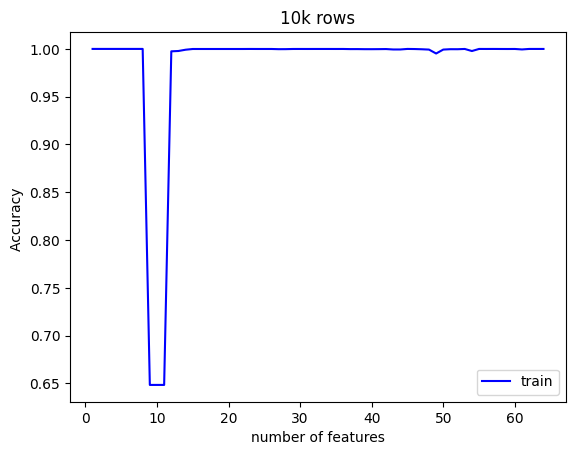

In [23]:
plt.plot(xords, yxxtrain, color='blue', label='train')

# plt.plot(xords, yxxtest, color='red', label='test')
plt.xlabel('number of features')
plt.ylabel('Accuracy ')
plt.title('10k rows')
plt.legend()

# Show the combined plot
plt.show()

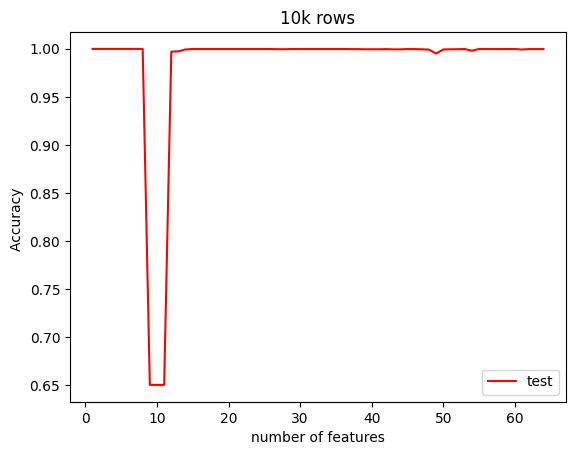

In [24]:
# plt.plot(xords, yxxtrain, color='blue', label='train')

plt.plot(xords, yxxtest, color='red', label='test')
plt.xlabel('number of features')
plt.ylabel('Accuracy ')
plt.title('10k rows')
plt.legend()

# Show the combined plot
plt.show()

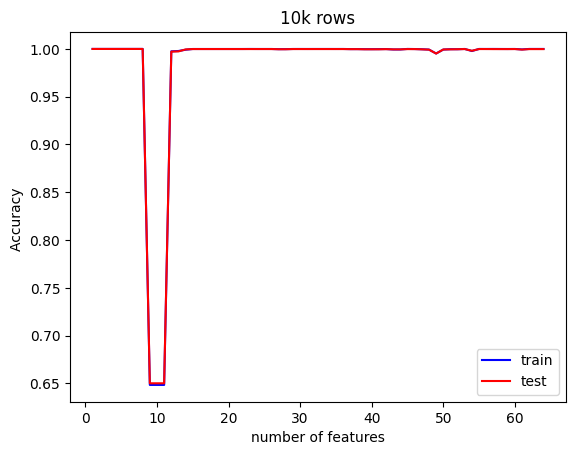

In [25]:
plt.plot(xords, yxxtrain, color='blue', label='train')

plt.plot(xords, yxxtest, color='red', label='test')
plt.xlabel('number of features')
plt.ylabel('Accuracy ')
plt.title('10k rows')
plt.legend()

# Show the combined plot
plt.show()

In [26]:
report[0]

NameError: name 'report' is not defined